In [31]:
%matplotlib inline
import cv2
import numpy
import matplotlib.pyplot as plt


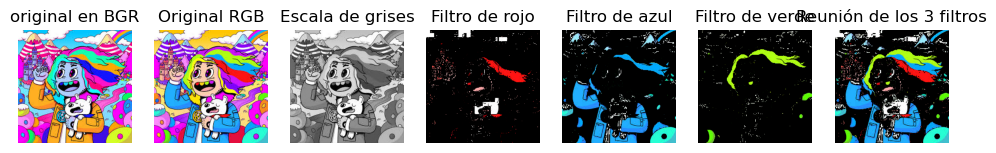

In [120]:
image = cv2.imread('../imgs/69.jpeg')
image_copy = image.copy()

# RGB to BGR
image_RGB = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB) 

# image_RGB = image
image_gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

# Filtro de rojo
hsv = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2HSV)
hue=cv2.split(hsv)[0]
mask=cv2.inRange(hue, 0,3)
mask2=cv2.inRange(hue, 177,180)
filtro_rojo = cv2.bitwise_and(image_RGB, image_RGB, mask=mask)
filtro_rojo2 = cv2.bitwise_and(image_RGB, image_RGB, mask=mask2)
ambas_mascaras = cv2.add(filtro_rojo2, filtro_rojo)

#MASCARA DE AZUL P. EJ.

mask3=cv2.inRange(hue,60,110)
filtro_azul = cv2.bitwise_and(image_RGB, image_RGB, mask=mask3)

mask4=cv2.inRange(hue, 35,60)
filtro_verde = cv2.bitwise_and(image_RGB, image_RGB, mask=mask4)

#juntamos rojo y azul

azul_y_rojo = cv2.addWeighted(ambas_mascaras,0.5, filtro_azul,0.5,0)

### Reunimos las 3 máscaras, pudiendo ver la diferencia al variar los umbrales 
### de las mascaras y los pesos al unir imagenes.

las_3_juntas=cv2.addWeighted(azul_y_rojo,2, filtro_verde,1,0)
fig, axes = plt.subplots(1, 7, figsize=(12,12))
axes[0].imshow(image)
axes[0].set_title('original en BGR')
axes[1].imshow(image_RGB)
axes[1].set_title('Original RGB')
axes[2].imshow(image_gray, cmap='gray')
axes[2].set_title('Escala de grises')
axes[3].imshow(ambas_mascaras)
axes[3].set_title('Filtro de rojo')
axes[4].imshow(filtro_azul, cmap='gray')
axes[4].set_title('Filtro de azul')
axes[5].imshow(filtro_verde, cmap='gray')
axes[5].set_title('Filtro de verde')
axes[6].imshow(las_3_juntas)
axes[6].set_title('Reunión de los 3 filtros')
for ax in axes:
    ax.axis('off')
